In [11]:
%matplotlib inline

In [22]:
import rosbag
bag = rosbag.Bag('data/2018-10-31-13-03-50_just_poses.bag')
counter = 0

with open("pose_data_1.txt", "w+") as f:
    firstline = True
    for topic, msg, t in bag.read_messages(topics=['/vrpn_client_node/spoon/pose']):
      if not firstline:
        f.write(",")
      firstline = False
      f.write("%f" % msg.pose.position.z)
      counter += 1
      if counter > 100000:
        break
    bag.close()

In [23]:
import numpy as np
z = np.loadtxt('pose_data_1.txt', delimiter=',')

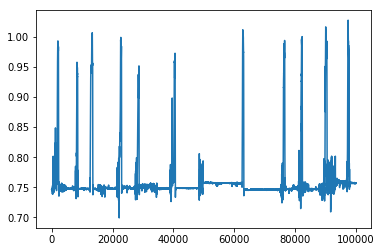

In [24]:
import matplotlib.pyplot as plt
plt.plot(z)

In [43]:
from hmmlearn import hmm
np.random.seed(42)

# params
num_states = 3
sticky = 0.8
#computed variables
nstick = (1-sticky)/(num_states-1.0)
min_val = np.min(z)
max_val = np.max(z)

In [51]:
# see https://hmmlearn.readthedocs.io/en/latest/tutorial.html
# sample from a fitted model
model = hmm.GaussianHMM(n_components=3, covariance_type="full")
model.startprob_ = np.ones(num_states) / num_states

model.transmat_ = np.full((num_states,num_states),nstick)
np.fill_diagonal(model.transmat_, sticky)

model.means_ = np.random.uniform(min_val, max_val, (num_states,1))
model.covars_ = np.tile(1, (num_states, 1, 1))
X, Z = model.sample(100)

In [56]:
# see https://hmmlearn.readthedocs.io/en/latest/tutorial.html
# sample from a fitted model
z_data = z.reshape(-1,1)
model = hmm.GaussianHMM(n_components=3, covariance_type="full", n_iter=100, params ="smtc")
model.fit(z_data)

GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=3, n_iter=100, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

[[0.74732689]
 [0.84838758]
 [0.75569889]]


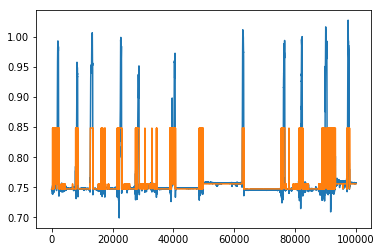

In [62]:
print(model.means_)
est_z = model.predict(z_data)
plt.plot(z)
plt.plot(model.means_[est_z])